# Demo de Visual Question Answering

Bienvenido a nuestra demo de visual question answering. A continuación, te guiarémos a través de los pasos necesarios para utilizar esta herramienta.

https://huggingface.co/tasks/visual-question-answering

 <img  src="https://production-media.paperswithcode.com/thumbnails/task/8e78f190-5fcf-4588-8345-bd213d03a80e.jpg">

## Pasos

1. **Importar las librerías** <img src="https://cdn-icons-png.flaticon.com/512/4185/4185510.png" alt="Instalar librerías" width="32" height="32">

2. **Descargar imagenes** <img src="https://cdn-icons-png.flaticon.com/512/1042/1042339.png" alt="Grabar video" width="32" height="32">

4. **Inferencia** <img src="https://cdn-icons-png.flaticon.com/512/4341/4341134.png" alt="Detectar objetos" width="32" height="32">

5. **Mostrar resultados** <img src="https://cdn-icons-png.flaticon.com/512/3418/3418886.png" alt="Mostrar resultados" width="32" height="32">

¡Comencemos con la demo!

# Importar las librerias

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from transformers import pipeline


In [2]:

def plot_results_1(results):
  answers = [result['answer'] for result in results]
  scores = [result['score'] for result in results]

  plt.figure(figsize=(6, 4))
  plt.bar(answers, scores)
  plt.xlabel('Answer')
  plt.ylabel('Score')
  plt.title('Results')
  plt.ylim(0, 1)
  plt.show()


def plot_results(results):
  # Convertir la lista de resultados a un DataFrame de pandas
  df = pd.DataFrame(results)

  # Crear una paleta de colores
  #palette = sns.color_palette("husl", len(df['answer'].unique()),hue)

  # Crear el diagrama de barras
  plt.figure(figsize=(4, 3))
  sns.barplot(x='answer', y='score', data=df, errorbar=None, hue='answer')

  # Personalizar el gráfico
  plt.title('Scores by Answer')
  plt.xlabel('Answer')
  plt.ylabel('Score')

  # Mostrar el gráfico
  plt.show()

# Descargar imagenes

In [3]:
!wget "https://i.ibb.co/r4LzSZT/1713806296304-2.jpg" -O aporta_image.jpeg

--2024-05-22 23:36:40--  https://i.ibb.co/r4LzSZT/1713806296304-2.jpg
Resolving i.ibb.co (i.ibb.co)... 162.19.58.158, 162.19.58.159, 162.19.58.157, ...
Connecting to i.ibb.co (i.ibb.co)|162.19.58.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71723 (70K) [image/jpeg]
Saving to: ‘aporta_image.jpeg’

aporta_image.jpeg   100%[===================>]  70.04K   338KB/s    in 0.2s    

2024-05-22 23:36:41 (338 KB/s) - ‘aporta_image.jpeg’ saved [71723/71723]



In [4]:
!wget "https://content.nationalgeographic.com.es/medio/2023/11/29/golden-retriever-corriendo_7a50f15e_231129131211_800x800.jpg" -O perro.jpeg

--2024-05-22 23:36:41--  https://content.nationalgeographic.com.es/medio/2023/11/29/golden-retriever-corriendo_7a50f15e_231129131211_800x800.jpg
Resolving content.nationalgeographic.com.es (content.nationalgeographic.com.es)... 2.19.117.145, 2.19.117.143
Connecting to content.nationalgeographic.com.es (content.nationalgeographic.com.es)|2.19.117.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82850 (81K) [image/jpeg]
Saving to: ‘perro.jpeg’

perro.jpeg          100%[===================>]  80.91K  --.-KB/s    in 0.02s   

2024-05-22 23:36:41 (3.67 MB/s) - ‘perro.jpeg’ saved [82850/82850]



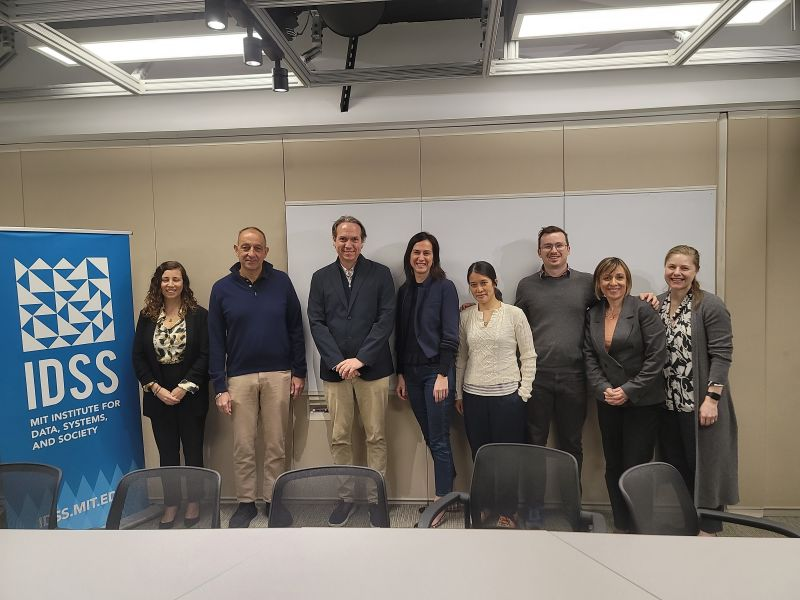

In [5]:
image =  Image.open("/content/aporta_image.jpeg")
image

# Inferencia

In [6]:

vqa_pipeline = pipeline("visual-question-answering",model = "dandelin/vilt-b32-finetuned-vqa")

question = "are they in an office?"

results = vqa_pipeline(image, question, top_k=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

In [7]:
results

[{'score': 0.963921844959259, 'answer': 'yes'},
 {'score': 0.5840352177619934, 'answer': 'no'}]

# Mostrar resultados

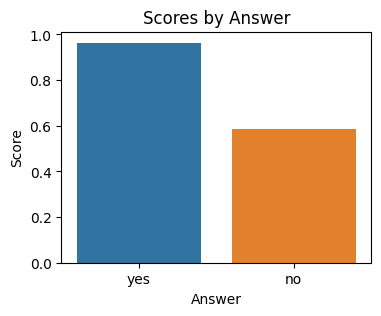

In [8]:
question = "are they in an office?"

results = vqa_pipeline(image, question, top_k=2)
plot_results(results)

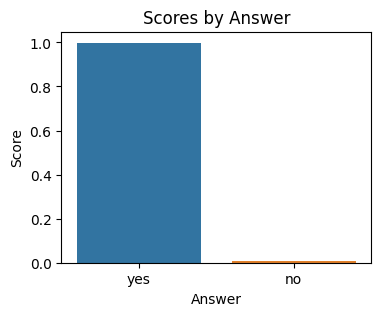

In [9]:
question = "are there people in the image?"

results = vqa_pipeline(image, question, top_k=2)
plot_results(results)

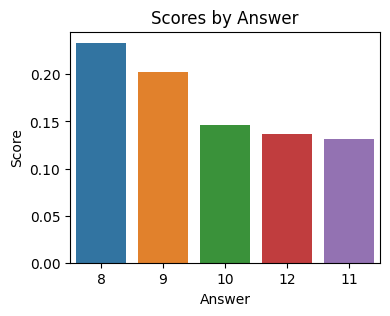

In [10]:
question = "how many people are in the image?"

results = vqa_pipeline(image, question, top_k=5)
plot_results(results)

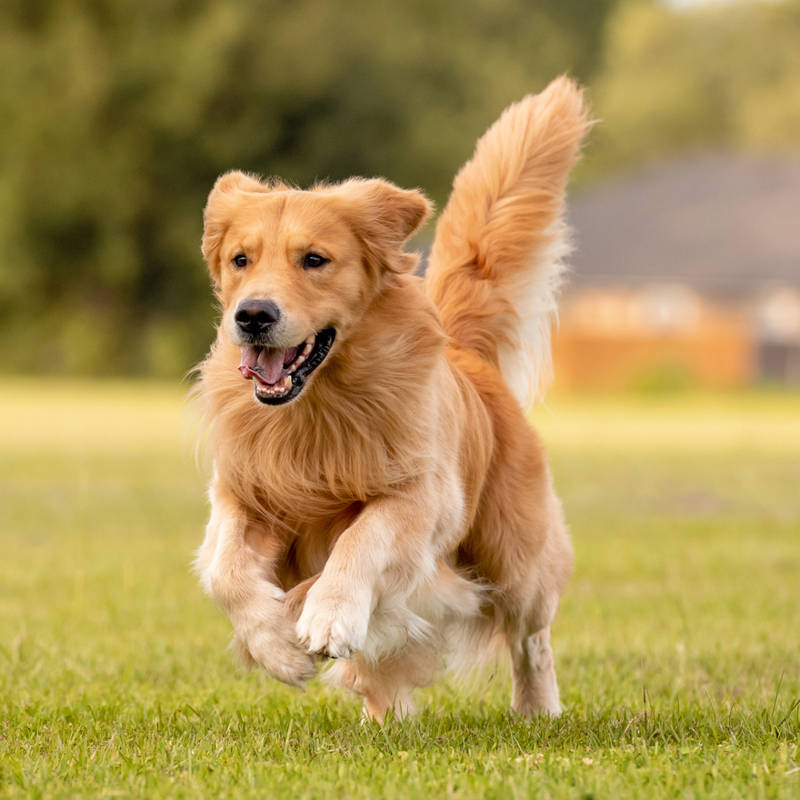

In [11]:
image_perro =  Image.open("/content/perro.jpeg")
image_perro

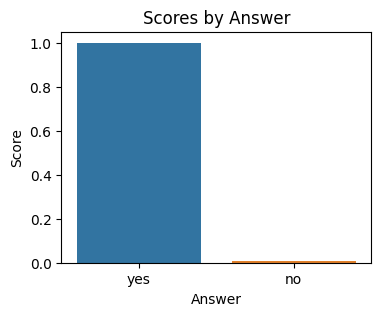

In [12]:
question = "is it a dog?"

results = vqa_pipeline(image_perro, question, top_k=2)
plot_results(results)

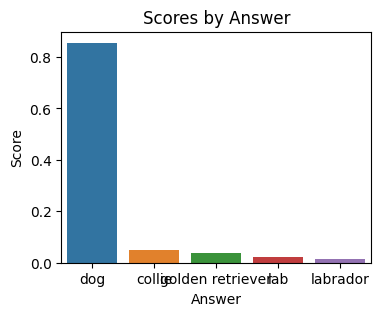

In [13]:
question = "What animal is in the picture? give me breed"

results = vqa_pipeline(image_perro, question, top_k=5)
plot_results(results)

In [14]:
from google.colab import files

# Subir la imagen
uploaded = files.upload()

# Obtener el nombre del archivo subido
for fn in uploaded.keys():
    # Guardar el archivo subido con el nombre "playa.jpeg"
    with open("playa.jpeg", "wb") as f:
        f.write(uploaded[fn])

print("Imagen guardada como playa.jpeg")


Saving playa.jpg to playa.jpg
Imagen guardada como playa.jpeg


In [17]:
image_playa =  Image.open("/content/playa.jpeg")
image_playa

Output hidden; open in https://colab.research.google.com to view.

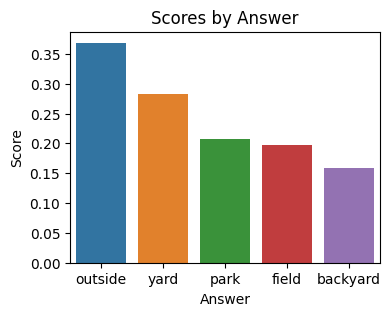

In [19]:
question = "where are they?"

results = vqa_pipeline(image_perro, question, top_k=5)
plot_results(results)